In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = ('/content/drive/MyDrive/5.Brain tumor project using CNN/brain tumor dataset/Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
  path = os.path.join(data_dir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) # Read as color
    img_array = cv2.resize(img_array, (128, 128)) # Resize to 224x224
    break
  break

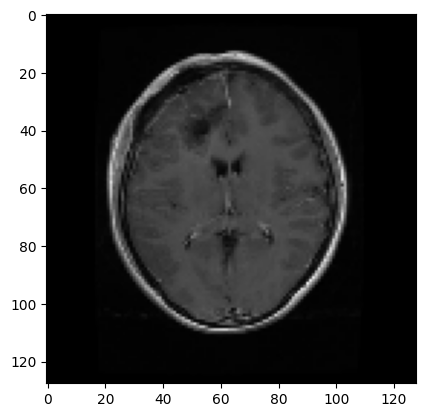

In [4]:
plt.imshow(img_array,cmap='gray')

In [5]:
img_array.shape

(128, 128, 3)

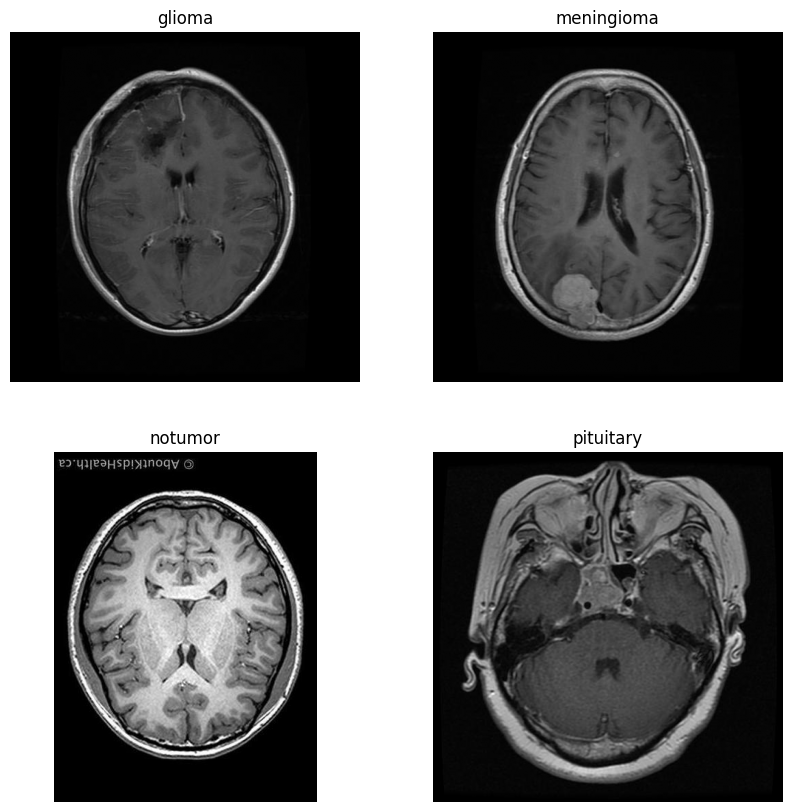

In [ ]:
# Displaying one image from each category
plt.figure(figsize=(10, 10))
for i, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    img = os.listdir(path)[0]  # Get the first image in each category
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 2, i + 1)
    plt.imshow(img_array,cmap='gray')
    plt.title(category)
    plt.axis('off')
plt.show()

In [6]:
for category in categories:
    path = os.path.join(data_dir, category)
    num_images = len(os.listdir(path))
    print(f"Category '{category}': {num_images} images")

Category 'glioma': 1441 images
Category 'meningioma': 1465 images
Category 'notumor': 1830 images
Category 'pituitary': 1577 images


In [ ]:
# Remove the import statement as it's moved to cell 16a14eb9
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# img_array = preprocess_input(img_array)

In [7]:
img_array.shape

(128, 128, 3)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

# Input settings and number of categories
input_shape = (128, 128, 3)
nb_classes = 4

# Download MobileNetV2 with pre-trained weight
base_model = MobileNetV2(input_shape=input_shape,
                         include_top=False,
                         weights='imagenet')

# Unfreeze the last 20 layers for practice only
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(nb_classes, activation='softmax')
])

# Reassembling the model after modifying trainable layers
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


 # Use standard metrics

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,446,980 (9.33 MB)

 Trainable params: 921,476 (3.52 MB)

 Non-trainable params: 1,525,504 (5.82 MB)

In [10]:
# Create ImageDataGenerators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255,
 #                                  validation_split=0.2)
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128), # Ensure target size matches model input
    batch_size=64,
    class_mode='categorical',
    subset='training',
    color_mode='rgb') # Ensure color images

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128), # Ensure target size matches model input
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb') # Ensure color images

Found 5051 images belonging to 4 classes.
Found 1262 images belonging to 4 classes.


In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
lr_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

history = model.fit(train_generator,epochs=70, validation_data=validation_generator, callbacks=[early_stopping, model_checkpoint,lr_callback])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
79/79 ━━━━━━━━━━━━━━━━━━━━ 3692s 47s/step - accuracy: 0.2739 - loss: 1.5034 - precision: 0.3099 - recall: 0.0732 - val_accuracy: 0.4342 - val_loss: 1.2575 - val_precision: 0.7792 - val_recall: 0.0475 - learning_rate: 1.0000e-05
Epoch 2/70
79/79 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.4125 - loss: 1.2725 - precision: 0.6019 - recall: 0.1498 - val_accuracy: 0.5523 - val_loss: 1.1378 - val_precision: 0.8534 - val_recall: 0.1569 - learning_rate: 1.0000e-05
Epoch 3/70
79/79 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5299 - loss: 1.0936 - precision: 0.7454 - recall: 0.2560 - val_accuracy: 0.5935 - val_loss: 1.0359 - val_precision: 0.8529 - val_recall: 0.3170 - learning_rate: 1.0000e-05
Epoch 4/70
79/79 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6118 - loss: 0.9818 - precision: 0.8049 - recall: 0.3455 - val_accuracy: 0.6363 - val_loss: 0.9423 - val_precision: 0.8443 - val_recall: 0.4081 - learning_rate: 1.0000e-05
Epoch 5/70
79/79 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step

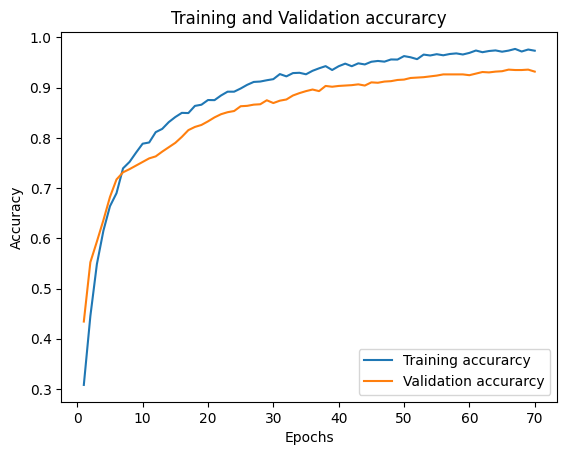

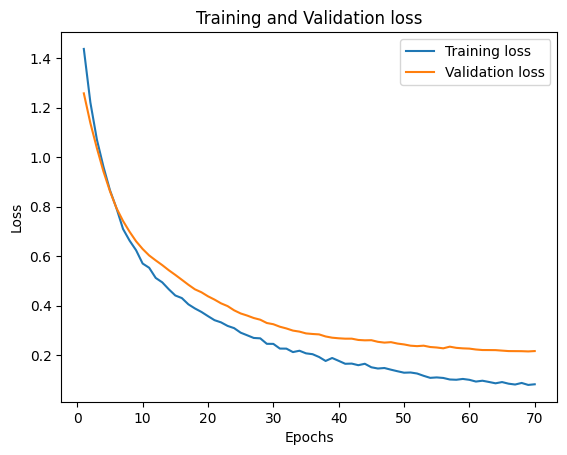

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, label='Training accurarcy')
plt.plot(epochs, val_acc, label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from tensorflow import keras
model = keras.models.load_model('/content/best_model.keras')

In [14]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/5.Brain tumor project using CNN/brain tumor dataset/Testing',
    target_size=(128, 128), # Ensure target size matches model input
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb')

Found 720 images belonging to 4 classes.


In [15]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 360s 30s/step - accuracy: 0.9793 - loss: 0.0546 - precision: 0.9815 - recall: 0.9773
Test Accuracy: 0.9708
Test Loss: 0.0841
Test Precision: 0.9735
Test Recall: 0.9694


In [16]:
from tqdm import tqdm
import numpy as np
y_test = []
y_test_int = []
for i in tqdm(range(len(test_generator))):
    y_test += test_generator[i][1].tolist()
    y_test_int += test_generator[i][1].argmax(axis=1).tolist()

y_test = np.array(y_test)
y_test_int = np.array(y_test_int)

100%|██████████| 12/12 [00:09<00:00,  1.21it/s]


12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step
Accuracy is:  0.9708333333333333


<Axes: >

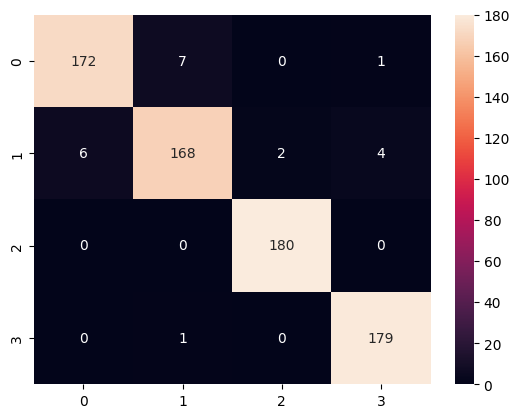

In [17]:
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_pred_test = model.predict(test_generator, verbose=1)
y_pred_test_int = y_pred_test.argmax(axis=1)


ac = accuracy_score(y_test_int, y_pred_test_int)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test_int, y_pred_test_int)
sn.heatmap(cm,annot=True,fmt="d")

In [18]:
from sklearn.metrics import classification_report
target_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(classification_report(y_test_int, y_pred_test_int, target_names=target_names, digits=4))

              precision    recall  f1-score   support

      glioma     0.9663    0.9556    0.9609       180
  meningioma     0.9545    0.9333    0.9438       180
     notumor     0.9890    1.0000    0.9945       180
   pituitary     0.9728    0.9944    0.9835       180

    accuracy                         0.9708       720
   macro avg     0.9707    0.9708    0.9707       720
weighted avg     0.9707    0.9708    0.9707       720



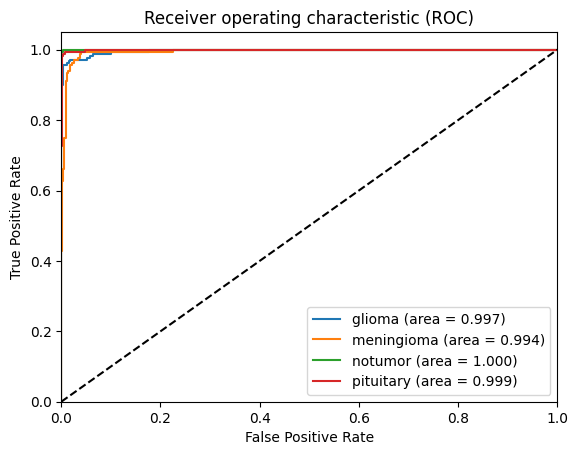

In [19]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for each class
plt.figure()
classes=['glioma', 'meningioma', 'notumor', 'pituitary']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='{} (area = {:0.3f})'.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [21]:
# Select any image from test folder and test it using the louded model

import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the image
img_path = '/content/drive/MyDrive/5.Brain tumor project using CNN/brain tumor dataset/Testing/glioma/Te-gl_0030.jpg'  # Replace with the actual image path
img = cv2.imread(img_path, cv2.IMREAD_COLOR) # Read as color image
img = cv2.resize(img, (128, 128))
img = image.img_to_array(img)
img = preprocess_input(img) # Use preprocess_input from MobileNetV2
img = np.expand_dims(img, axis=0)  #convert from (128, 128, 3) to (1, 128, 128, 3).

# Make a prediction
prediction = model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction)

# Print the prediction
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: 0


**Reasoning**:
Install the required libraries for the Streamlit application, including streamlit, tensorflow, keras, numpy, and opencv-python.



In [22]:
!pip install streamlit tensorflow keras numpy opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.4 MB/s eta 0:00:00


## Create a streamlit app file

### Subtask:
Create a Python file that will contain the Streamlit app code.


**Reasoning**:
Create a new Python file named `app.py` and open it for editing.



In [23]:
# This is a placeholder for the Streamlit app code.
# We will add the actual code in the next steps.
with open('app.py', 'w') as f:
    f.write("# Streamlit app code goes here")


## Write the streamlit app code

### Subtask:
Write the code to create the interface, handle image uploads, preprocess the image, make predictions using the trained model, and display the results.


**Reasoning**:
Write the Streamlit application code to handle image uploads, preprocessing, prediction, and displaying results in `app.py`.



In [34]:
!ngrok authtoken "34mRpXW7VFL1FamC7y6wPGkrNSN_7syhDmoXvrSi6mS5Y9Jcq"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


## Run the streamlit app

### Subtask:
Run the Streamlit app from the Colab notebook.


**Reasoning**:
Run the Streamlit app using the `!streamlit run` command with the `--share` flag.



In [25]:
!streamlit run app.py --share

Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: No such option: --share Did you mean --help?


**Reasoning**:
The previous attempt to run the Streamlit app failed because the `--share` option was not recognized. I will try running the app without the `--share` flag first to ensure the app runs locally, and then investigate how to get a public URL if needed.



## Install pyngrok

### Subtask:
Install the pyngrok library.

**Reasoning**:
Install the `pyngrok` library to create a public URL for the Streamlit app.

In [28]:
!pip install pyngrok

## Expose the Streamlit app with pyngrok

### Subtask:
Use pyngrok to create a public URL for the Streamlit app.

**Reasoning**:
Import `ngrok` from `pyngrok` and create a tunnel to the Streamlit app's port (8501). This will provide a public URL that you can use to access the app.

In [30]:
# Save the trained model
model.save('/content/brain_tumor_model.keras')
print("Model saved successfully!")

Model saved successfully!


In [36]:
%%writefile /content/app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2

# Load pre-trained Keras model
model = tf.keras.models.load_model('/content/best_model.keras')

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

st.title("🧠 Brain Tumor Detection")
st.write("Upload a brain MRI image to classify the type of tumor.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg","jpeg","png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    st.write("Classifying...")

    img_array = np.array(image)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    img_array = cv2.resize(img_array, (128,128))
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = class_names[class_idx]
    confidence = np.max(prediction) * 100

    st.subheader(f"Prediction: {class_name}")
    st.write(f"Confidence: {confidence:.2f}%")


Overwriting /content/app.py


In [37]:
from pyngrok import ngrok
import subprocess

# Start Streamlit in background
cmd = ["streamlit", "run", "/content/app.py"]
proc = subprocess.Popen(cmd)

# Open ngrok tunnel
public_url = ngrok.connect(8501)
print("🚀 Streamlit App URL:", public_url)


🚀 Streamlit App URL: NgrokTunnel: "https://celesta-unaustere-presumably.ngrok-free.dev" -> "http://localhost:8501"


In [38]:
from google.colab import files

files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files


files.download("/content/app.py")


files.download("/content/best_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>